<a href="https://colab.research.google.com/github/ParulSrivastava98/PlayStore-App-Data-Analysis/blob/main/Play_Store_App_Review_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
##Importing Data of play store app review
import pandas as pd
df_psd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Play Store Data.csv')
df_psd.shape

(10841, 13)

In [32]:
##Importing Data of user review
import pandas as pd
df_ur=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/User Reviews.csv')
df_ur.shape

(64295, 5)

In [33]:
##Importing Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
##Displaying top 5 dataframe of play store data frame
df_psd.head()    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
##Displaying Top 5 dataframe of user review
df_ur.head()     

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:
##Displaying all Columns in playstore dataframe
df_psd.columns       


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [37]:
##Displaying all Columns in user review dataframe
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [38]:
## Description of play store app review data
df_psd.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [39]:
## Description of User review data
df_ur.describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [40]:
## Information of play store app review data
df_psd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [41]:
## Information of User review data
df_ur.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##**DATA CLEANING**
Firstly we have to find the missing values in the dataframe if any further we will deal with missing values.


In [42]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From the above we got that the maximum null values are in the Rating Column followed by the Current Ver after that Android Ver, Content Rating and Type.

##**Data may have some null, NaN or repeated/replicated values we need to find those and remove them.**




In [43]:
df_psd[df_psd.duplicated(subset=['App'], keep='first')]  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


##**Now, we have to remove the duplicated values.**


In [44]:
df_psd.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True) ##Using drop
df_psd[df_psd.duplicated(subset=['App'], keep='first')]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##**Further we will replace the null values with the mean value of the columns.**

In [46]:
##Overall Rating Mean
mean = df_psd["Rating"].mean()
print(mean)

4.17505184823716


*For the Rating Column:*

In [47]:
df_psd['Rating'].fillna(mean,inplace=True)
print(df_psd)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

*For the Current Ver Column:*

In [48]:
df_psd['Current Ver'].fillna(mean,inplace=True)
print(df_psd)


                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

*For the Android Ver Column:*

In [49]:
df_psd['Android Ver'].fillna(mean,inplace=True)
print(df_psd)


                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

*For the Content Rating Column:*

In [50]:
df_psd['Content Rating'].fillna(mean,inplace=True)
print(df_psd)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

*For the Type Column:*

In [51]:
df_psd['Type'].fillna(mean,inplace=True)


##**Now checking Null values removed or not**




In [52]:
df_psd.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##Check for the Rating Column as the Rating needs to be between 1 and 5.

In [53]:
df_psd[df_psd.Rating<1]
##To check no Ratings is below 1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [54]:
df_psd[df_psd['Rating']>5]
##To check no Ratings is above 5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,4.175052,"February 11, 2018",1.0.19,4.0 and up,4.175052


In [55]:
df_psd.drop([9300],inplace=True)
##Droping this cell as the rating is above 5


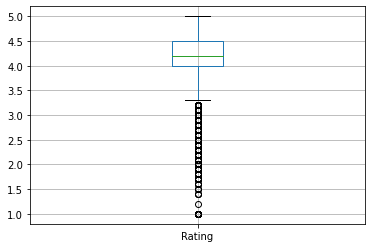

In [56]:
df_psd.boxplot()
##For checking the rating is between 1 and 5 only


##SOME OBSERVATIONS MADE ARE AS FOLLOWS 







## All Apps with 5 star Rating




In [57]:
df_psd[df_psd['Rating']==5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
293,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
511,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
514,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
532,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
535,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
9563,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
9595,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
9639,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


##Average Apps Rating overall 

In [58]:
df_psd['Rating'].mean()


4.1735170156300825

##Top five category getting Higest average Rating



In [59]:
df_psd.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)


Category
EDUCATION              4.362816
EVENTS                 4.358219
ART_AND_DESIGN         4.348831
BOOKS_AND_REFERENCE    4.304404
PERSONALIZATION        4.299612
Name: Rating, dtype: float64

## Apps with maximum Reviews


In [60]:
max_reviews=df_psd[df_psd['Reviews'].max()==df_psd['Reviews']]['App'].head().index
df_psd['App'][max_reviews]

2338    GollerCepte Live Score
Name: App, dtype: object

##Count of Free and Paid Apps


In [61]:
df_psd['Type'].value_counts()


Free                8902
Paid                 756
4.17505184823716       1
Name: Type, dtype: int64

##Top 5 apps having maximum installs

In [62]:
max_installs=df_psd['Installs'].sort_values(ascending=False).head().index
df_psd.iloc[max_installs]['App']

342           UC Browser - Fast Download Private & Secure
1410                                       My Talking Tom
6486    Security Master - Antivirus, VPN, AppLock, Boo...
2527                           SHAREit - Transfer & Share
2508                                     Google Translate
Name: App, dtype: object

##Top 5 apps having maximum Reviews

In [63]:
max_Reviews=df_psd['Reviews'].sort_values(ascending=False).head().index
df_psd.iloc[max_Reviews]['App']

2338               GollerCepte Live Score
4027         Ad Block REMOVER - NEED ROOT
2132                  SnipSnap Coupon App
2503                           DreamTrips
2381    US Open Tennis Championships 2018
Name: App, dtype: object

##**DATA VISUALIZATION**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Topmost categories on Playstore

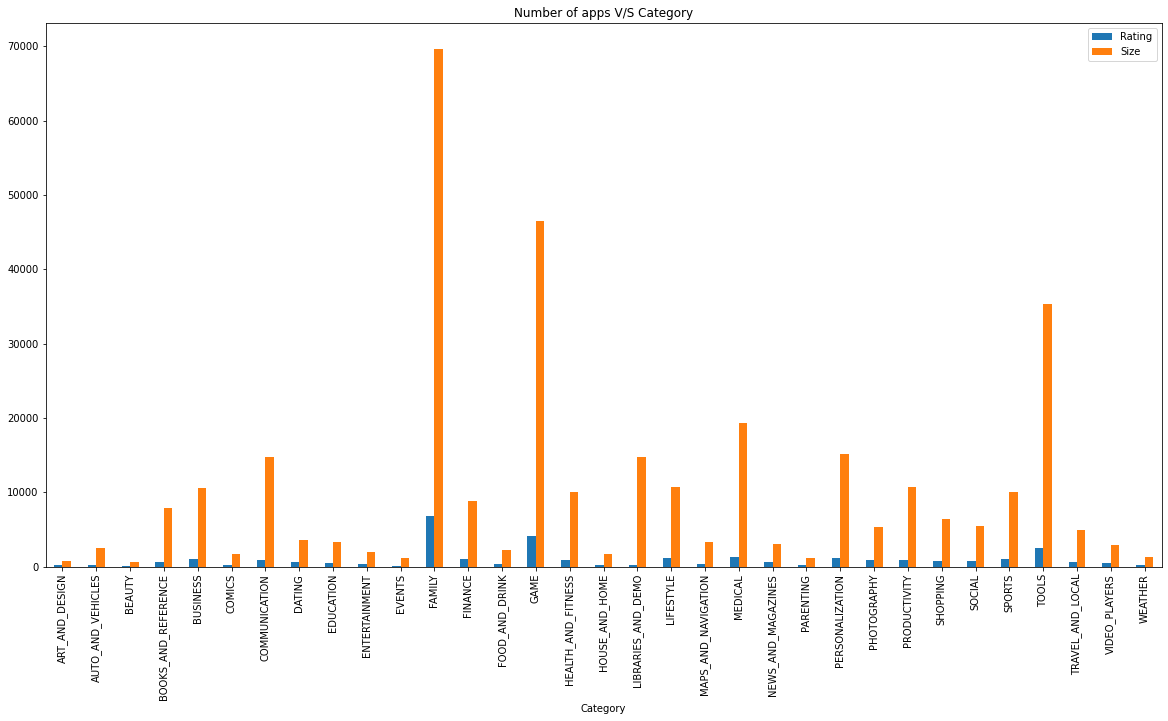

In [28]:
df_psd.groupby('Category').sum().plot.bar(figsize=(20,10))
plt.title("Number of apps V/S Category");

The observations made from this is that the category Family is the most populary used category by play store users.
After that, Game and Tools is the highest used category by play store users, followed by business medicals etc.

##**PIECHART DEPICTING APPLICATIONS CATEGORY**

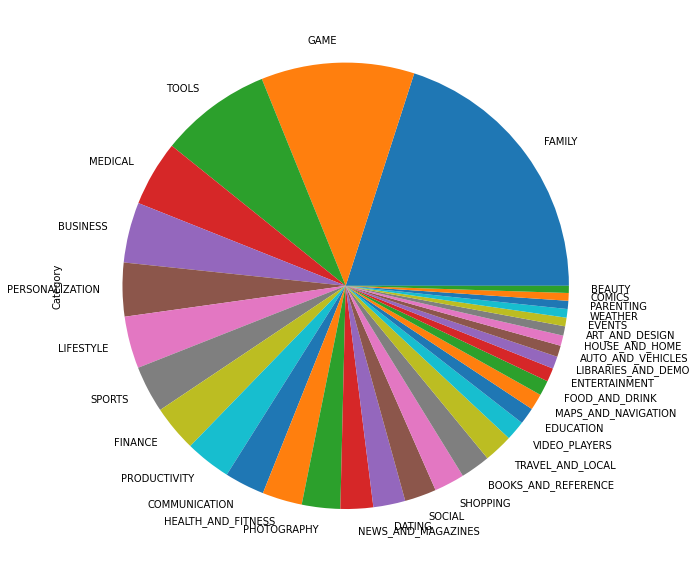

In [10]:
#plot the pie chart of categories
df_psd.Category.value_counts(normalize=False).plot.pie()
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = False
plt.show()

From the above pie chart we can analyze that the popularly used categories are Family, games and tools. After that comes medical and business while other categories comprises of very less part of the pie chart.

In [6]:
df_psd['Size']=df_psd['Size'].str.replace('M','')
df_psd['Size']=df_psd['Size'].str.replace('k','')

In [17]:
df_psd.drop(df_psd[df_psd['Size'] == '1,000+'].index, inplace=True)
df_psd.drop(df_psd[df_psd['Size'] == 'Varies with device'].index, inplace=True)
df_psd.Size=df_psd.Size.astype('float')


##**We are taking three columns under consideration to draw inferences-**

***The columns are namely Installs, Size and Rating.***

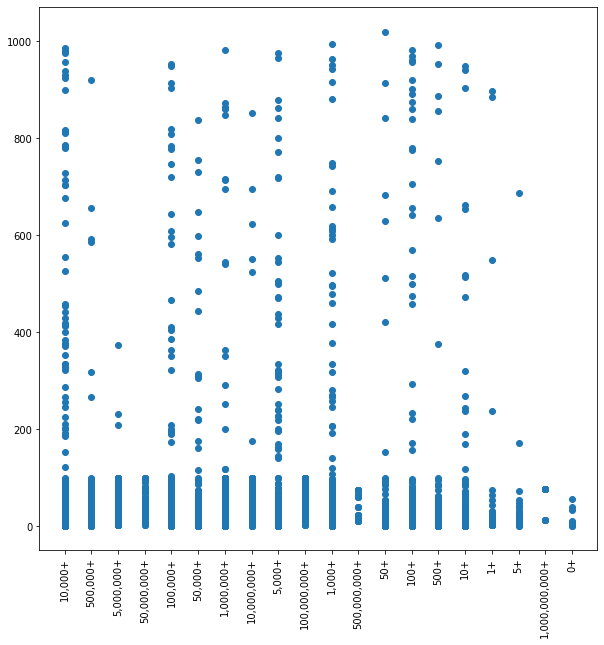

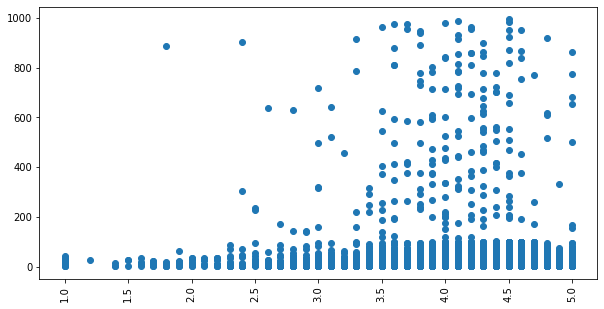

In [21]:
#plot the scatter plot of Installs and Size variable in data
plt.scatter(df_psd.Installs,df_psd.Size)
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

plt.scatter(df_psd.Rating,df_psd.Size)
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


From the above first scatter plot the inference made is that lesser the size of an application is the more likely it is to be installed as compared to the applications with more size.

And from the second scatter plot inference is that higher rating is obtained by low smaller size applications compared to larger size applications.

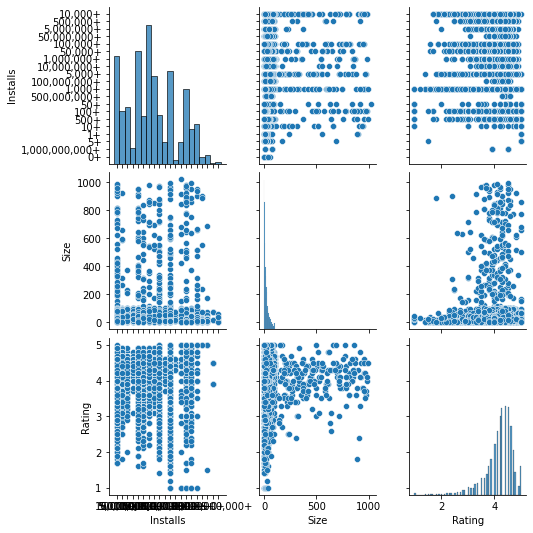

In [27]:
#plot the pair plot of Installs, Size and Rating in dataframe.
sns.pairplot(data =df_psd, vars=['Installs','Size','Rating'])
plt.xticks(rotation=180)
plt.show()


From the above scatter plot the inference drawn is the relationships among the various variables namely Installs, Size and Ratings. Dots is used to represent them, they are basically used to monitor how changing one variable affects the others. As here we can see greater the size is more are the number of installs as well as reviews.

##**CONTENT RATING CATEGORY**

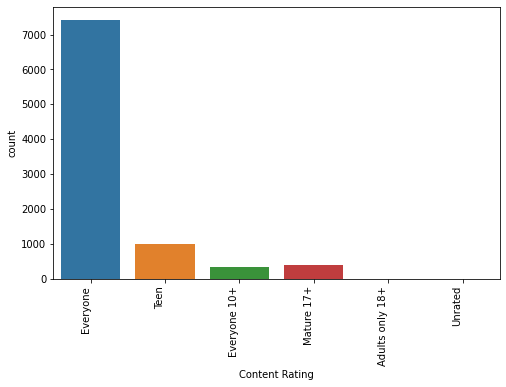

In [46]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 90, ha = 'right')
ax =sns.countplot(x='Content Rating', data=df_psd)

From the above count plot of Category "everyone" is the widely used set of content rating used by the developers making it more age-friendly. Most of the applications can be accessed by every age group.

##**SENTIMENT ANALYSIS OF USER REVIEWS**

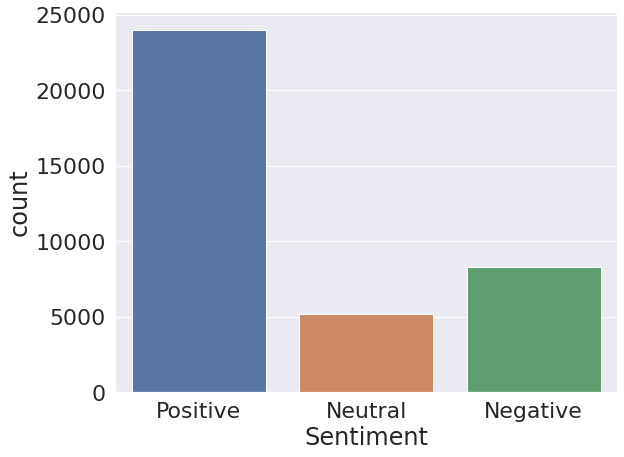

In [47]:
plt.figure(figsize=(9,7))
sns.set(font_scale=2)
sns.countplot(x="Sentiment", data = df_ur)
plt.show()

The graph shows maximum sentiment are positive, positive sentiment shows user satisfaction with the application. Then comes the second highest as negative sentiment and neutral sentiment is the last one.

##**DISPLOT: Showing normal Rating Distribuition analysis -**




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


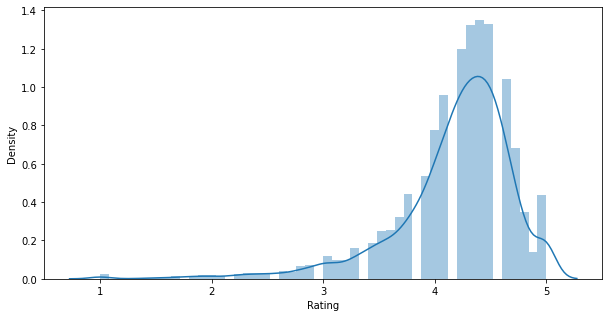

In [22]:
sns.distplot(df_psd["Rating"]) ##Distribuition of Rating


It gives the inference that the ratings are more between 4.0 and 5.0, which implies more the rating the better the applications is liked by the users. Also it tells about the customer satisfaction.

##**JOINTPLOT: Showing relationship between Rating and Size -**

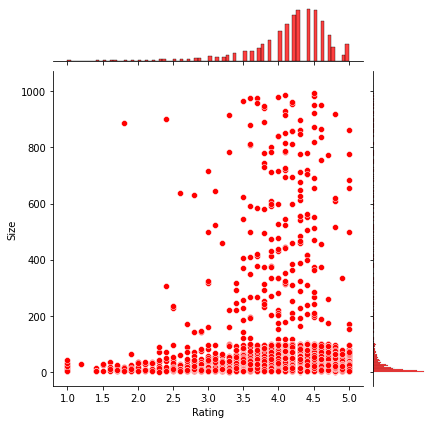

In [26]:
import seaborn as sns
sns.jointplot(x = "Rating", y = "Size", kind = "scatter", color='r', data = df_psd)

# Showing the plot
plt.show()

From this jointplot the inference is that the applications having size around 30MB had the rating between 4.0 to 4.5MB. And so we can conclude that applications which are smaller in size, like less than 20MB,can have a 5.0 rating. Since, it is more preferred by users.

##**CONCLUSIONS :**

From the Play Store App data we got to know that it has various applications present for all the purposes. What makes an application more successful is that it needs to be age friendly have a size that is light for users to use it with ease. Also, other factors which influenced users were positive sentiments, more number of installs, better reviews. Furthermore free applications were more loved and used by the users.